| <font color='red'>Belangerijk !!</font> |
|:---|
|Lees voor het maken de inleverinstructies door in de toetsbeschrijving (MS Teams, kanaal algemeen, Files, Moduledocumentatie).  Het niet opvolgen van deze instructies kan leiden tot een onvoldoende |

# Clustering van students spotify playlists

Tijdens de eerste les van machine learning maakte je kennis met de basis principes van Machine Learning en de machine learning workflow.

Dankzij de kennisclips kennen jullie nu de theorie achter <b>Clustering</b>. Laten we deze methode eens gaan toepassen: 

We hebben een dataset van spotify playlists waar onze studenten naar luisteren. We willen, aan de hand van de eigenschappen van deze playlists, de playlists classificeren op muziekgenre. We weten helaas niet welke playlist tot welk muziekgenre behoort. Ook weten we niet hoeveel verschillende muziekgenres zijn. 

We gaan dus gebruik maken van unsupervised learning om clusters te maken, waarbij elk cluster 1 muziekgenre is. 
Ook moeten we uitzoeken hoeveel verschillende muziekgenres of clusters er zijn. Onze onderzoeksvraag kunnen we dan als volgt definieren:

    Hoeveel verschillende muziekgenres kunnen worden gevonden op basis van de eigenschappen van playlists?

Hieronder is de dataset beschreven. Deze dataset heeft per playlist, dus per rij, de volgende variabelen:

__Tabel 1:__ De variabelen van de spotify playlists
<table>
    <tr>
        <th>Variabele</th>
        <th>kolomnaam</th>
        <th>Datatype</th>
        <th>Waarde</th>
    </tr>
    <tr>
        <td>PID</td>
        <td>Playlist ID</td>
        <td>int64</td>
    </tr>
    <tr>
        <td>Gezamenlijke</td>
        <td>Een binare waarde of de playlist door meerdere gebruikers wordt geluisterd. Als deze waarde True is, dan kunnen meerdere gebruikers nummers bijdragen aan een gezamenlijke playlist.</td>
        <td>object (string)</td>
        <td>true, false </td>
    </tr>
    <tr>
        <td>Aantal_tracks</td>
        <td>het aantal nummers of liedjes in de playlist</td>
        <td>Float64</td>
    </tr>
    <tr>
        <td>Aantal_albums</td>
        <td>het aantal unieke albums voor de nummers in de playlist. Als een playlist 10 liedjes van hetzelfde album bestaat, is deze waarde 1.</td>
        <td>Float64</td>
    </tr>
    <tr>
        <td>Aantal_volgers</td>
        <td>het aantal volgers dat deze playlist heeft</td>
        <td>Float64</td>
    </tr>
    <tr>
        <td>Aantal_edits</td>
        <td>het aantal afzonderlijke bewerkingssessies dat de playlist heeft. Een bewerking bestaat uit aanpassen van de playlist door bijvoorbeeld het verwijderen of toevoegen van nummers</td>
        <td>Float64</td>
    </tr>
    <tr>
        <td>Looptijd_ms</td>
        <td>de totale duur van alle nummers in de playlist (in milliseconden)</td>
        <td>int64</td>
    </tr>
    <tr>
        <td>Aantal_artiesten</td>
        <td>het totale aantal unieke artiesten voor de nummers in de playlist, waarbij een band als 1 artiest wordt beschouwd. Een duet tussen 2 onafhankelijke artiesten, zoals Ronnie Flex en Maan, tellen als 2 artiesten.</td>
        <td>int64</td>
    </tr>
 
</table>

Voordat je de data laadt en ermee aan de slag gaat, moet je de libraries die je van gebruikt maakt importeren.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## 1. Data voorbereiden

Ten eerste gaan we de data inlezen in a dataframe, dan gaan we de data voorbereiden.

### inlezen data

### <font color='red'>Opdracht</font> 
Zet in onderstaande variabele ```pad_naar_file``` het pad naar jouw dataset. Dit kan een relatief of een absoluut pad zijn. De output van de variabele moet van het type String (str) zijn.

Maak daarna de functie ```read_data``` af. De functie krijgt een string met de filelokatie als input, leest deze in en geeft een pandas dataframe terug.

De input variabele:

    csv_file: het relatieve of absolute pad naar de csv file, datatype str

De output:

    dataframe: de inhoud van de csv file het type Pandas Dataframe

In [2]:
pad_naar_file = "playlists_gegevens.csv"

In [3]:
def read_data(csv_file):
    #zet hier de code om de CSV file in te lezen, gebruik makend van de variabele csv_file
    # laat de functie een dataframe teruggeven
    dataframe = pd.read_csv(csv_file)
    return dataframe
    
#hier wordt jouw functie aangeroepen en bevat df nu het dataframe
df = read_data(pad_naar_file);

### Inzicht en visualisatie data 

Begrip van de data en de data  visualisatie is een belangerijk stap om te snappen hoe de variabelen zijn verdeeld.

### <font color='red'>Opdracht</font> 
Schrijf hieronder de code om meer informatie over de data te krijgen. Je schrijft per cel de gevraagde functie

Voordat je kmeans gaat gebruiken, het is belangrijk om te zorgen dat de data numeriek is. Als je kolommen met string waarden hebt, moet je het datatype naar numeriek transformeren. 
<b>Dataframe.info()</b> is een functie die de datatypes van de kolommen geeft.
Schrijf in de volgende code blok de code om de datatypes van alle kolomen van de dataframe te krijgen

In [4]:
#schrijf hier jouw code die informatie over jouw dataframe print:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PID               1000 non-null   int64  
 1   Gezamenlijke      975 non-null    object 
 2   Aantal_tracks     996 non-null    float64
 3   Aantal_albums     993 non-null    float64
 4   Aantal_volgers    999 non-null    float64
 5   Aantal_edits      975 non-null    float64
 6   Looptijd_ms       996 non-null    float64
 7   Aantal_artiesten  1000 non-null   int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 62.6+ KB


Print de eerste 5 playlists van de dataset uit

In [5]:
#schrijf hier jouw code die naar de bovenste rijen kijkt
df.head(5)

,PID,Gezamenlijke,Aantal_tracks,Aantal_albums,Aantal_volgers,Aantal_edits,Looptijd_ms,Aantal_artiesten
0,3000,False,16.0,16.0,1.0,4.0,3484812.0,16
1,3001,False,26.0,20.0,1.0,4.0,6432550.0,13
2,3002,False,12.0,12.0,1.0,5.0,2570961.0,11
3,3003,False,245.0,210.0,1.0,174.0,NaN,193
4,3004,False,53.0,50.0,1.0,24.0,12117712.0,38


Print de laatste 5 playlists van de dataset uit

In [6]:
#schrijf hier jouw code die de laatste 5 rijen kijkt
df.tail(5)

,PID,Gezamenlijke,Aantal_tracks,Aantal_albums,Aantal_volgers,Aantal_edits,Looptijd_ms,Aantal_artiesten
995,3995,False,33.0,26.0,1.0,7.0,8477473.0,17
996,3996,False,68.0,63.0,1.0,28.0,15525546.0,54
997,3997,False,33.0,33.0,1.0,20.0,8997965.0,29
998,3998,False,187.0,97.0,3.0,58.0,43506514.0,54
999,3999,False,97.0,56.0,1.0,9.0,22548683.0,17


Kijk naar de beschrijvende statistieken van onze numerieke waarden:

In [7]:
#schrijf hier jouw code die de beschijvende statistiken uitprint
df.describe()

,PID,Aantal_tracks,Aantal_albums,Aantal_volgers,Aantal_edits,Looptijd_ms,Aantal_artiesten
count,1000.000000,996.000000,993.000000,999.000000,975.000000,9.960000e+02,1000.000000
mean,3499.501000,66.461847,49.702920,1.629630,18.135385,1.567760e+07,37.979000
std,288.818667,53.922758,40.370804,3.083826,21.129699,1.317545e+07,30.394117
min,3000.000000,5.000000,4.000000,1.000000,2.000000,1.130465e+06,3.000000
25%,3249.750000,26.000000,20.000000,1.000000,5.000000,6.043515e+06,16.000000
50%,3499.500000,49.000000,36.000000,1.000000,10.000000,1.139729e+07,29.000000
75%,3749.250000,91.000000,68.000000,1.000000,22.000000,2.143433e+07,52.000000
max,3999.000000,248.000000,233.000000,53.000000,174.000000,7.997390e+07,199.000000


### <font color='red'>Opdracht</font> 

In werkcollege 1 heb je geleerd dat je kunt het Seaborn functies gebruiken om visualisaties uit de data te maken: <b>pairplot</b> om numeriek data te visualiseren en <b>countplot</b> om categorisch data te visualiseren.

### countplot

<AxesSubplot:xlabel='Gezamenlijke', ylabel='count'>

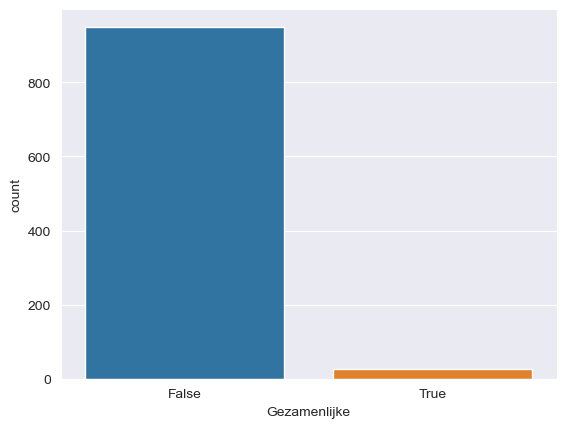

In [8]:
# Schrijf hier je code die een plot van de variabele "Gezamenlijke" maakt.
sns.countplot(x="Gezamenlijke", data=df)

### pairplot
#### samples plotten voor snelheid & geheugengebruik
Als je een pairplot maakt, heb je misschien gemerkt dat het langzaam gaat. Dat komt omdat seaborn __elk__ punt intekent. Door een sample te nemen van tussen de 500 en 1000 rijen, heb je al een representatief beeld van de verdeling van de data èn gaat het plotten een stuk sneller. In onderstaande code neem ik een sample met het commando 

```df.sample(500)```.


#### True/ False kolommen verwijderen
Valt het je op dat de kolom gezamelijke niet getekent wordt? Dit komt omdat de pairplot niet werkt voor kolommen met True/False.. 
We maken dus een temp dataset aan met onze numerieke kolommen om die te plotten:

```tmp = df[["Aantal_tracks","Aantal_albums","Aantal_volgers", "Aantal_edits", "Looptijd_ms","Aantal_artiesten"]]``` 

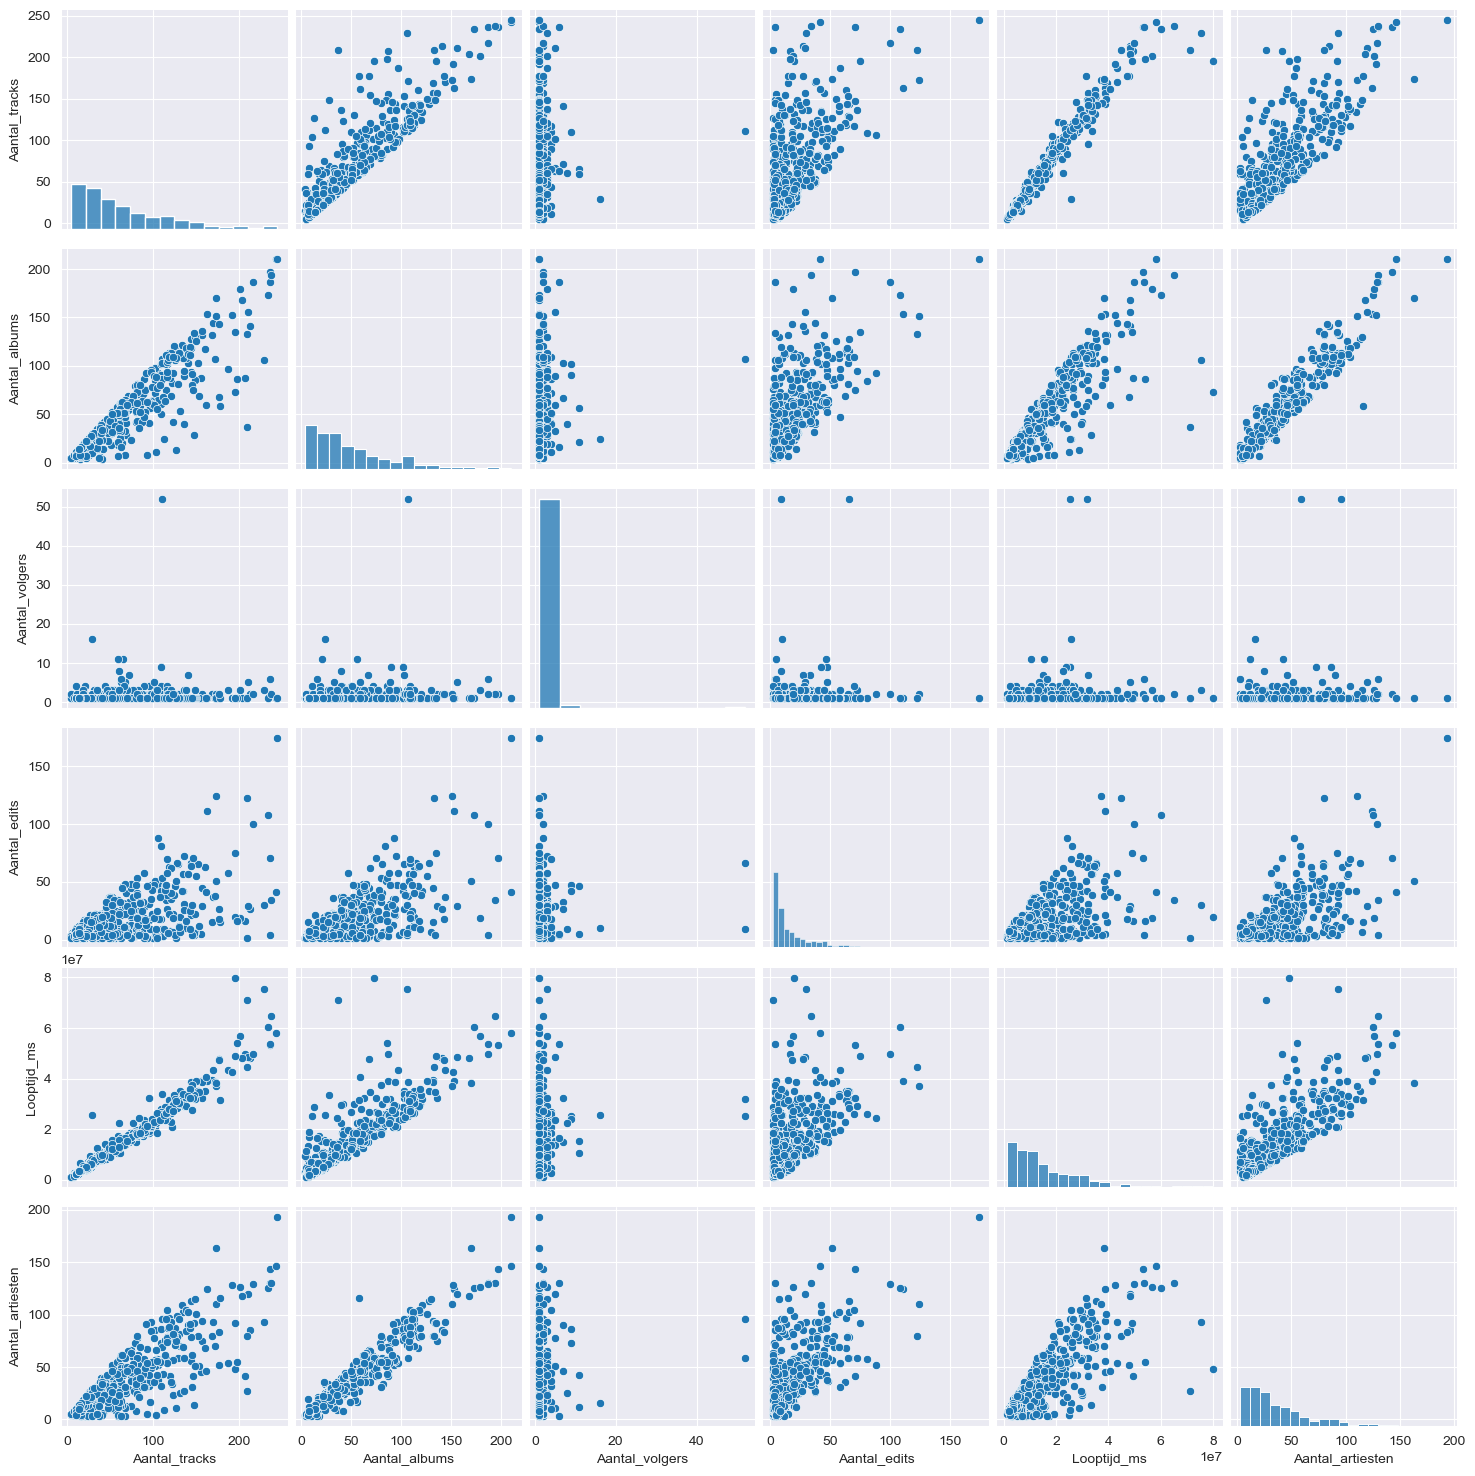

In [9]:
# Schrijf hier je code die een pairplot laat zien van alle numerieke kolommen met maximum 500 samples
tmp = df[["Aantal_tracks","Aantal_albums","Aantal_volgers", "Aantal_edits", "Looptijd_ms","Aantal_artiesten"]]
sns.pairplot(tmp.sample(500))

### null waarden

De functie info() die je eerder hebt gebruiken geeft het aantal null waarden in de dataframe. In machine learning het is belangerijk dat je de null waarden in je data invul, voordat je je data modellert. Kmeans dat we gaan straks gebruiken is een voorbeeld van algorithm die niet aan missende waarden kan.

Je hebt in werkcollege1 geleerd dat je missende waarden kan invullen met modus, median of mean.

In [10]:
#print het overzicht met het aantal NaN per kolom:
df.isnull().sum()

PID                  0
Gezamenlijke        25
Aantal_tracks        4
Aantal_albums        7
Aantal_volgers       1
Aantal_edits        25
Looptijd_ms          4
Aantal_artiesten     0
dtype: int64

### <font color='red'>Opdracht</font> 
Maak onderstaande functie ```vervang_nan``` af. Deze functie krijgt een dataframe en vervangt de NaN met een goede vervangende waarde in de kolommen 'Gezamenlijke', 'Aantal_tracks', 'Aantal_albums', 'Aantal_volgers', 'Aantal_edits', 'Looptijd_ms'

De input variabele:

    dataframe: een Pandas dataframe met gegevens van playlists inclusief nullwaarden

De output:

    dataframe:  een dataframe waarbij alle nullwaarden zijn vervangen door zinnige  waarden.

In [11]:
def vervang_nan(dataframe):

    #schrijf hier de code om de nullwaarden te vervangen
    #gebruik de functie fillna() om de nullwaarden te vervangen

    dataframe['Gezamenlijke'] = dataframe['Gezamenlijke'].fillna(dataframe['Gezamenlijke'].mode()[0])
    dataframe['Aantal_tracks'] = dataframe['Aantal_tracks'].fillna(dataframe['Aantal_tracks'].mode()[0])
    dataframe['Aantal_albums'] = dataframe['Aantal_albums'].fillna(dataframe['Aantal_albums'].mode()[0])
    dataframe['Aantal_volgers'] = dataframe['Aantal_volgers'].fillna(dataframe['Aantal_volgers'].mode()[0])
    dataframe['Aantal_edits'] = dataframe['Aantal_edits'].fillna(dataframe['Aantal_edits'].mode()[0])
    dataframe['Looptijd_ms'] = dataframe['Looptijd_ms'].fillna(dataframe['Looptijd_ms'].mode()[0])

    #geef het dataframe terug
    return df

Laten we nu controleren of het werkt. Onderstaande code roept jouw functie aan en kijkt daarna of alle nullwaarden zijn vervangen. In pandas kun je de functie ```is.null```  gebruiken om te testen of een cel een NaN waarde heeft of niet. Vervolgens kun je die waarden optellen per rij (axis=1) of kolom (axis=0) . Het optellem per kolom is meestal het zinnigste om te doen:

In [12]:
#roep hier de vervang_nan functie aan 
df = vervang_nan(df)
# controleer dat er na het aanroepen van de functie er geen NaN meer in de file zijn:

df.isnull().sum()

PID                 0
Gezamenlijke        0
Aantal_tracks       0
Aantal_albums       0
Aantal_volgers      0
Aantal_edits        0
Looptijd_ms         0
Aantal_artiesten    0
dtype: int64

#### Vervang namen categorische data

Zoals we in de output van de functie info() gezien hebben, bevat de dataset categorische data van het datatype string. Voor machine learning moeten we die omzetten naar getallen. 

Als je met (```df['Gezamenlijke'].unique()```) naar de unique waarden in de kolom 'Gezamenlijke' kijkt, zie je dat deze kolom True/False waarden bevaat (of Booleaanse waarden). 

Je kunt de True/False naar 0/1 omzetten met gebruik van de commando ``` dataframe['Gezamenlijke'] = dataframe['Gezamenlijke'].astype(int)``` 

### <font color='red'>Opdracht</font> 
Maak onderstaande functie ```vervang_categorienaam``` af, welke een dataframe met de kolom 'Gezamenlijke' als input verwacht. De output is een dataframe waarvan de eerstgenoemde kolom naar nummers is omgezet. 

De input variabele:

    dataframe: een Pandas dataframe met gegevens van playlists inclusief strings voor categorie data

De output:

    dataframe:  een dataframe waarbij alle strings van categorien zijn vervangen door nummers.

In [13]:
def vervang_categorienaam(dataframe):
    # Schrijf hier de code die de waardes van Gezamenlijke (false en true) naar 0 en 1 omzet
    dataframe = dataframe.replace({'Gezamenlijke': {False: 0, True: 1}})
    return dataframe

In [14]:
#roep de functie aan op ons dataframe, daarna controleren we de data door even naar een aantal rijen te kijken
df = vervang_categorienaam(df)
df.head(5)

,PID,Gezamenlijke,Aantal_tracks,Aantal_albums,Aantal_volgers,Aantal_edits,Looptijd_ms,Aantal_artiesten
0,3000,0,16.0,16.0,1.0,4.0,3484812.0,16
1,3001,0,26.0,20.0,1.0,4.0,6432550.0,13
2,3002,0,12.0,12.0,1.0,5.0,2570961.0,11
3,3003,0,245.0,210.0,1.0,174.0,1130465.0,193
4,3004,0,53.0,50.0,1.0,24.0,12117712.0,38


#### verwijder kolommen die niks bijdragen
Hiervoor kijken we naar de kolommen die hoog met elkaar gecorreleerd zijn of een uniek identifier zijn. 

<AxesSubplot:>

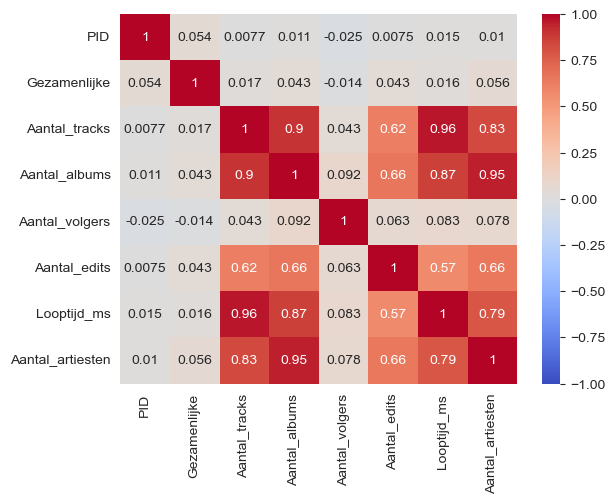

In [15]:
#schrijf hier code voor een correlatiematrix te plotten
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

### <font color='red'>Opdracht</font> 
Maak onderstaande functie ```verwijder_kolommen``` af. De output is een dataframe waarvan de kolommen, die niks toevoegen, zijn verwijderd. Volg hierbij de regels uit werkcollege 1. 

De input variabele:

    dataframe: een Pandas dataframe met de kolommen 'PID', 'gezamelijke', 'Aantal_tracks','Aantal_albums','Aantal_volgers', 'Aantal_edits', 'Looptijd_ms','Aantal_artiesten'
    

De output:

    dataframe:  een Pandas dataframe met alleen kolommen die voldoende bijdragen.

In [16]:
def verwijder_kolommen(dataframe):
    #schrijf hier de code die de gecorreleerde kolommen weggooid.
    dataframe = dataframe.drop(['Aantal_tracks','Aantal_albums', 'Looptijd_ms', 'PID'], axis=1)
    return dataframe

<AxesSubplot:>

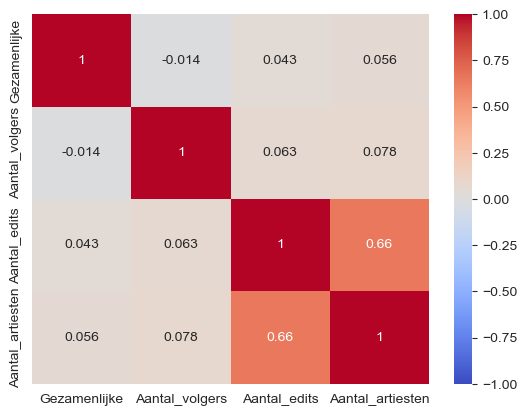

In [17]:
df = verwijder_kolommen(df)
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

#### Visualisatie met gelabelde scatterplot

Je kunt de datapunten in een scatterplot visualiseren. Dat doen we door de ```scatterplot``` functie van Seaborn. Angezien de data meerdere dimensies (variabelen) heeft, het is niet mogellijk om alle dimensies in 1 figuur te plotten. 

In een scatterplot kun je 2 dimenties kwijt (x-as, bijvoorbeeld 'Aantal_volgers' en y-as kies je  'Looptijd_ms' (of een andere kolom als je looptijd_ms deleted hebt vanwege correlatie). Je kunt dan een derde dimentie plotten door de kleur (hue) aan te geven: ('Gezamenlijke').

```sns.scatterplot(x=df['Aantal_volgers'],y=df['Looptijd_ms'], hue=df['Gezamenlijke'],  alpha=1, s=7)```

<AxesSubplot:xlabel='Aantal_volgers', ylabel='Aantal_edits'>

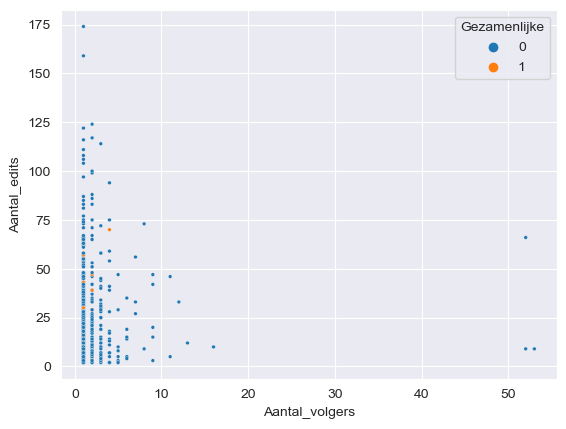

In [18]:
#Maak een scatterplot die 3 dimenties van jouw dataset laat zien. 
#Zorg dat je kolommen gebruikt die in jouw dataset zijn achtergebleven
sns.scatterplot(x=df['Aantal_volgers'],y=df['Aantal_edits'], hue=df['Gezamenlijke'],  alpha=1, s=7)

Van deze techniek gaan we later bij de clusters gebruik van maken.

### Schalen & standaardizeren 

In werkcollege 1 heb je geleerd dat standardisatie is een belangerijke stap van data voorbereiden. Het helpt om variabelen tot het gemiddelde op de 0 ligt met een standaarddeviate van 1 te schalen. Hiervoor maken we een Standaardscaler object van de sklearn module aan ```scaler = StandardScaler()```. Dit object zorgt ervoor dat al onze data in 1 stap op de juiste manier gestandaardiseerd wordt:

 - ```scaler = StandardScaler()``` we maken ons model aan
 - ```data = scaler.fit(data)```  we fitten onze scalar op de data en maar transformeren we die nog niet. 
 - ```data = scaler.transform(data)``` nu gaan we onze data transformeren op de scalar die al eerder gefit is. 
 - ```data = scaler.fit_transform(data)```  we fitten onze scalar op de data en die transformeren we naar een verdeling met gemiddelde = 0 en standaard deviate is 1. 
 

### <font color='red'>Opdracht</font> 
1. Schrijf de code om een scaler object van het type StandardScaler van de module aan te maken
2. Leer de scaler object hoe data van deze dataset gestandaardiseerd moet worden.


In [19]:
#scaler = #1. maak van scaler een variabele van het type StandardScaler
scaler = StandardScaler()


#2. zet hier code om het scaler object te leren hoe data van deze dataset gestandaardiseerd moet worden.
#   Maar nog niet de data laat schalen!
scaler.fit(df)






StandardScaler()

De dataset kan nu gestandaardiseerd worden door gebruik te maken van het aangemaakte scaler object. Echter hier moeten we nog een extra stap doen: de transform geeft een dataset van het type numpy array terug. 

Die gaan we weer omzetten naar een pandas DataFrame met de juiste kolomnamen voor onze eigen interpretatie. Die stoppen we in variabele X om aan te geven dat die klaar is voor Machine Learning.

In [20]:
col_names= list(df.columns)

X = pd.DataFrame(scaler.transform(df), columns=col_names)

Controleer of de waardes in het dataframe inderdaad geschaald zijn:

In [21]:
#schrijf hier jouw code
X.describe()

,Gezamenlijke,Aantal_volgers,Aantal_edits,Aantal_artiesten
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,4.983236e-16,-1.038059e-16,-9.792167e-17,8.326673e-18
std,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.601282e-01,-2.041674e-01,-7.508102e-01,-1.151424e+00
25%,-1.601282e-01,-2.041674e-01,-6.555116e-01,-7.234952e-01
50%,-1.601282e-01,-2.041674e-01,-3.696157e-01,-2.955668e-01
75%,-1.601282e-01,-2.041674e-01,2.021760e-01,4.615372e-01
max,6.244998e+00,1.667454e+01,7.444872e+00,5.300419e+00


### Splitsen van de dataset

Zoals je bij __supervised learning__ gezien hebt, splitsen we de dataset in:
- ```X``` : een dataframe met meerdere rijden (matrix) voor onafhankelijke variabelen 
- ```y``` : een serie (vector) voor de afhankelijke variabelen, namelijk de uitkomsten die we willen weten en waarop we ons model trainen.

Bij __unsupervised learning__ hebben we geen uitkomsten waarop we ons model op kunnen trainen. We hebben dus alleen een dataframe vol onafhankelijke variabelen. Ons dataframe met onze voorbereide data is onze ```X``` geworden.  
We hebben geen ```y``` om op te trainen. We hebben straks natuurlijk wel de uitkomsten van ons clustering algoritme.


In [22]:
from sklearn.model_selection import train_test_split

#schrijf hier jouw code
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# 2 Clustering

Nu kunnen we onze datapunten gaan in clusters groeperen. Dit proces noemen we <b>CLUSTERING</b>

<b>CLUSTERING</b> is een type van machine learning algorithmen die groeps uit de data maken. De data die we bij clustering gebruiken is unlabeld data, dat betekent dat de data bestaat uit alleen maar onafhakelijke variabelen. Bij clustering is de afhankelijke variabele niet bekend. 
We gebruiken dus clustering om bijvoorbeeld bloemen te groeperen in onderscheidend groepen/categories te groeperen op basis van hun kenmerken. De datapunten die tot dezelfde groep behoort lijken op elkaar.

De algorithmen die we tijdens dit vak gaan behandelen zijn:
- Kmeans
- Mean-shift

### Kmeans toepassen

Kmeans is een algorithm die clusters maakt volgens de volgende stappen:
- je definieert k, dat verwijst naar het aantal centroides dat je nodig hebt in de dataset. Een centroide vertegenwoordigt het centrum van de cluster. 
- Elk datapunt wordt toegewezen aan elk van de clusters door de in-cluster-som van kwadraten te verminderen.
Met andere woorden, het K-means-algoritme identificeert k aantal centroides en wijst vervolgens elk datapunt toe aan het dichtstbijzijnde cluster, terwijl de centroides zo klein mogelijk worden gehouden.

Om Kmeans toe te passen ga je een Kmeans object maken. We gaan de functie <b>KMeans</b> van de sklearn pakket gebruiken waarin n_clusters(het aantal clusters) moet gegeven worden.

De commando ```kmeans_object = KMeans(n_clusters=2)```kan je gebruiken om het KMeans object te maken dat de dataset in 2 clusters opdeelt.

Door de functie fit op de kmeans_object aan te roepen (```kmeans_fit=kmeans_object.fit(dataframe)```), worden clusters genereerd en elke datapunt aan het dichtst cluster toegwezen.

### <font color='red'>Opdracht</font> 
Schrijf code om onze playlist dataset in 3 clusters op te delen. 

In [23]:
kmeans_object = KMeans(n_clusters=3)
# Schrijf je code hier die 3 clusters uit de playlists genereerd

# Schrijf je code hier die kmean_object op je genormaliseerd data aan te roepen
kmeans_fit = kmeans_object.fit(X)

In [24]:
type(kmeans_object)

sklearn.cluster._kmeans.KMeans

De kmeans genereert numerieke labels voor elke datapunt. Dat label geeft aan in welk cluster/groep de data valt. Omdat we hebben gezegd dat er 3 clusters moeten zijn, zullen we de volgende labels tegenkomen: 0, 1 of 2. Elke rij (dus elke playlist) krijgt een label die aangeeft tot welk cluster die playlist hoort.

```kmeans_fit.labels_``` print de labels die bij de kmeans zijn genereerd uit. Let hierbij op de _ aan het einde!

In [25]:
labels_km = kmeans_fit.labels_
# schrijf je code hier die de labels van de clusters opvraagt en de variabele labels_km plakt.

Door de unieke waarden van deze labels op te vragen, kunnen we achterhalen hoeveel clusters meanshift heeft gevonden. Omdat labels_ms van het type numpy array is, moeten we de ```np.unique(labels_ms)``` gebruiken in plaats van ```labels_ms.unique()``` (voor Pandas dataframes):

<AxesSubplot:ylabel='count'>

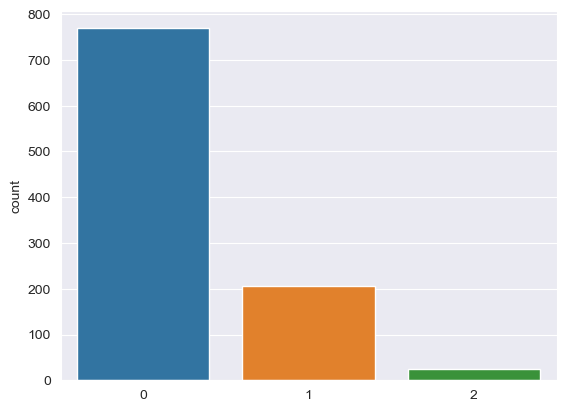

In [26]:
#print een visualisatie mbh een couplot, waarin we kunnen zien hoe vaak het aantal labels die voorkomt:
sns.countplot(x=labels_km)

In [27]:
print( f"De gevonden labels van de clusters: {np.unique(labels_km)}" )
print( f"Er zijn dus {max(labels_km)+1} groepen / clusters" )

De gevonden labels van de clusters: [0 1 2]
Er zijn dus 3 groepen / clusters


#### centroids
Wat heeft KMeans gevonden als de centers van ons clustering algoritme? 

Voor elk center krijgen we een __featurevector__ met punten die op onze data passen:

In [28]:
kmeans_fit.cluster_centers_

array([[-0.16012815, -0.07796123, -0.37773284, -0.40309469],
       [-0.16012815,  0.30162651,  1.37744867,  1.46248689],
       [ 6.244998  , -0.08731484,  0.26888508,  0.34830077]])

Dit zegt ons niet zoveel, dus laten we deze waarden terugschalen (__inverse__ transform) zoals ze voor de standaardisatie waren. Ook stoppen we ze in een pandas dataframe, zodat we de kolommen erbij zien. Nu zie je per cluster, de waarde van elke kolom, zoals die in het centrum van het cluster ligt:


In [29]:
#haal de originele ongeschaalde waardes terug
centroids = scaler.inverse_transform(kmeans_fit.cluster_centers_)
#maak een dataframe van de centroids
centroids_df = pd.DataFrame(centroids, columns=X.columns)

#### nieuwe data 
Stel dat we nieuwe data hebben, kunnen we ons gebouwede kmeans model loslaten op de nieuwe data. Dat kan weer op dezelfde manier als in werkcollege1: door het gebruik van ```.predict```:

In [30]:
#print de predicted waardes uit van onze clusters
kmeans_fit.predict(X)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

Omdat we onze dataset niet hebben opgesplitst (we hebben namelijk geen afhankelijke data om te valideren of we het goed gedaan hebben), kunnen we deze stap voor vandaag overslaan. 

### Meanshift toepassen

In tegenstelling tot kmeans,is Meanshift is een clustering algorithme waarin je het aantal clusters k hoef niet vooraf te specificeren. De kern van het algoritme is om datapunten iteratief toe aan de clusters te wijzen door de punten te verschuiven naar de dichtste densiteit center.

Om de Meanshift toe te passen gaan we eerst een MeanShift object maken door het commando MeanShift(), daarna passen we het gemaakt object toe aan ons gestandiseerd data dat we in standard_data hebben opgeslaan. Dat doen we door het gebruik van de functie .fit(dataframe)


### <font color='red'>Opdracht</font>

In [31]:

meanshift_object = MeanShift()

# Schrijf je code hier die het MeanShift object maakt


meanshift_fit = meanshift_object.fit(X)

# Schrijf je code hier die het MeanShift clustering toe aan standard_data past


Net als Kmeans, genereert Meanshift ook numerieke labels voor elk datapunt. Elk label verwijst naar het cluster aan wie het datapunt toebehoort. 

In [32]:
labels_ms  =  meanshift_object.labels_


Door de unieke waarden van deze labels op te vragen, kunnen we achterhalen hoeveel clusters meanshift heeft gevonden. 

De gevonden labels van de clusters: [ 0  1  2  3  4  5  6  7  8  9 10 11]
Er zijn 12 clusters


<AxesSubplot:ylabel='count'>

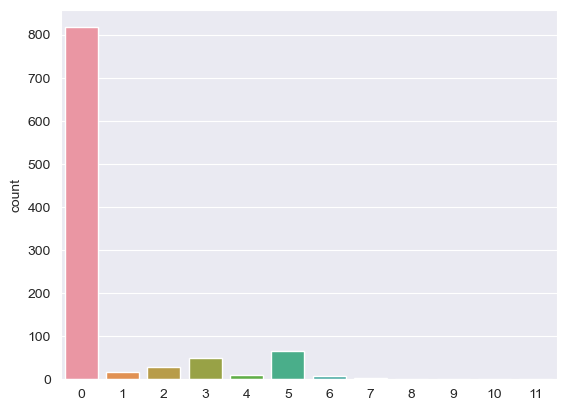

In [33]:
#schrijf hier code om te kijken hoeveel clusters meanshift heeft gevonden.

print( f"De gevonden labels van de clusters: {np.unique(labels_ms)}" )
print( f"Er zijn {max(labels_ms)+1} clusters" )

#print een visualisatie van het aantal labels die voorkomen:
sns.countplot(x=labels_ms)


In [34]:
#n_clusters moet van het type integer zijn en de waarde wordt het aantal clusters die meanshift heeft gevonden.
n_clusters = max(labels_ms)+1

# 3 Cluster validatie

## Zijn onze clusters goed?

Om deze vraag te beantwoorden gaan we eens kijken of de clusters compact zijn en de data mooi van elkaar gescheiden is. Dat doen we door het gebruik van een maat (metric) die <b>Silhouette score</b> heet. 

De silhouetscore geeft een indicatie van de afstand tussen de elementen binnen 1 cluster ten opzichte van elkaar en de gemiddelde afstand tussen de elementen van dat cluster en de centroid van het dichtsbijzijnde andere cluster.  


De waarde van de Silhouette-score varieert tussen -1 en 1: 
- Als de score 1 is, is het cluster compact (__hoge intra-cluster simularity__) en goed gescheiden van de andere clusters (__lage intra-cluster simularity__). 
- Een waarde van 0 betekent dat de clusters overlappen. 
- een negatieve score [-1, 0] geeft aan dat de datapunten aan de verkeerde clusters zijn toegewezen.

Laten we nu het score berekenen voor beide clustering algoritmes! 
Ga naar https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html om te kijken hoe je de functie moet gebruiken. 
    
Dit waren onze variabelen:

- ```labels_km```: gevonden clusters van de KMeans clustering
- ```labels_ms```: gevonden clusters van de meanshift clustering

In [35]:
#bereken de ilhouette_score voor KMeans clustering
s_score_km =  silhouette_score(X, labels_km)

print(f"silhouette_score voor KMeans clustering is {s_score_km}")


silhouette_score voor KMeans clustering is 0.5930231919992036


In [36]:
s_score_ms =  silhouette_score(X, labels_ms)

#bereken de ilhouette_score voor Mean Shift clustering
print(f"silhouette_score voor Mean Shift clustering is {s_score_ms}")

#print deze uit

silhouette_score voor Mean Shift clustering is 0.521736716992785


### <font color='red'>Opdracht</font> 
We hebben nu de silouette score voor beide clustering algoritmes berekend. Beredeneer nu voor jezelf:
1. Zijn dit goede score's? 
2. Welke is nu beter? 
3. Wat zegt deze informatie over het aantal clusters in de dataset?

Dit zijn prima scores, gezien 1 het optimale resultaat is en -1 het slechtste. -.5 is een redelijk goede score.

De silhouettescore voor de KMeans clustering is hoger dan die van de Mean Shift clustering. Dit betekent dat de KMeans clustering beter is dan de Mean Shift clustering.

De silhouettescore geeft aan dat de clusters goed gescheiden zijn van elkaar. Dit betekent dat de clusters goed zijn.

# 4 De elbow method

Bij de toepassing van Kmeans hierboven, hebben we gekozen om 3 clusters uit de data de maken. Maar de vraag die je zou aan jezelf zou kunnen vragen is: "Waarom 3 clusters"? "Waarom niet 2 of 4"? 

Het antwoord is dat we vaak niet weten uit hoeveel clusters, of groepen, onze data bestaat. Zoals je gezien hebt, werkt meanshift niet altijd even optimaal. Daarom gebruiken we een andere methode, die ons helpt om het aantal clusters te bepalen. 

Dit is de zogenaamde _'elbow method'_. 
Bij deze techniek, definieren we het minimale en maximale aantal aantal clusters.  Bijvoorbeeld we maken een range van clusters tussen de 1 en 10. Voor elk aantal clusters berekenen we de kwalitiet van de fit: de inertia (per datapunt berekenen we de afstand tot het centroid van het cluster waartoe het datapunt behoort). 
Door per cluster de kwaliteitsscore in een grafiek te zetten, kunnen we dan nagaan wat het optimale aantal clusters is. 

- bepaal het bereik van de clusters (K). We geven deze als hyperparameter mee met het commando ```K = range(1, 10) ```
- Eerst maken we een lege lijst waar we later de gemiddelde afstanden tot het centroide instoppen. Dat doen we met het commando ```meanDispersions = [] ```
- We gebruiken een forloop om voor elke i in K
    * K-means clustering uit te voeren:  ```KMeans(n_clusters=i) ``` en ```kmeans_object.fit(dataframe) ```
    * de inertia te berekenen als kwaliteitsscore: ```kmeans.inertia_```
    * deze voegen we toe aan de meanDispersions lijst: ```meanDispersions.append(score)```


### <font color='red'>Opdracht</font> 
Maak onderstaande functie ```elbow_method``` af, welke een dataframe als input verwacht. De output is een lijst die net zo lang is als K, en voor elke waarde van K een de inertie (of de gemiddelde afstanden tot het centroide) bevat.

De input variabele:

    dataframe: een Pandas dataframe met gegevens van playlists 
    K: een integer die het maximale aantal de clusters aangeeft waarop Kmeans moet worden toegepast

De output:

    dataframe:  een lijst met numerieke waarden  waarin elke waarde is de inertie is van 1 kmeans object.

In [37]:
# Vul onderstaande code aan, zodat elke iteratie:
# - een kmeansobject wordt aangemaakt met een groter aantal clusters, waarvoor 
# - het kmeans object op de data wordt gefit 
# - de kwaliteitsscore wordt berekend en in de variabele 'inertia' geplaatst wordt

def elbow_method(dataframe, max_K):

    meanDispersions = []
    for i in max_K:
        kmeans_object = KMeans(n_clusters=i)
        kmeans_object.fit(dataframe)
        inertia = kmeans_object.inertia_

        meanDispersions.append(inertia)
    return meanDispersions
    

In [38]:
#max aantal clusters is 10
K = range(1, 10) 

# roep de functie elbow_method aan om alle inertia voor alle K clusters te berekenen
dispersions = elbow_method(X,K)

C:\Users\Wbouh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Nu dat we een lijst (dispersions) met de berekende inertie, we kunnen de waarden plotten om het optimal k (aantal clusters) te beperken.
De plot van een eelbow method lijkt aan de hieronder curve.

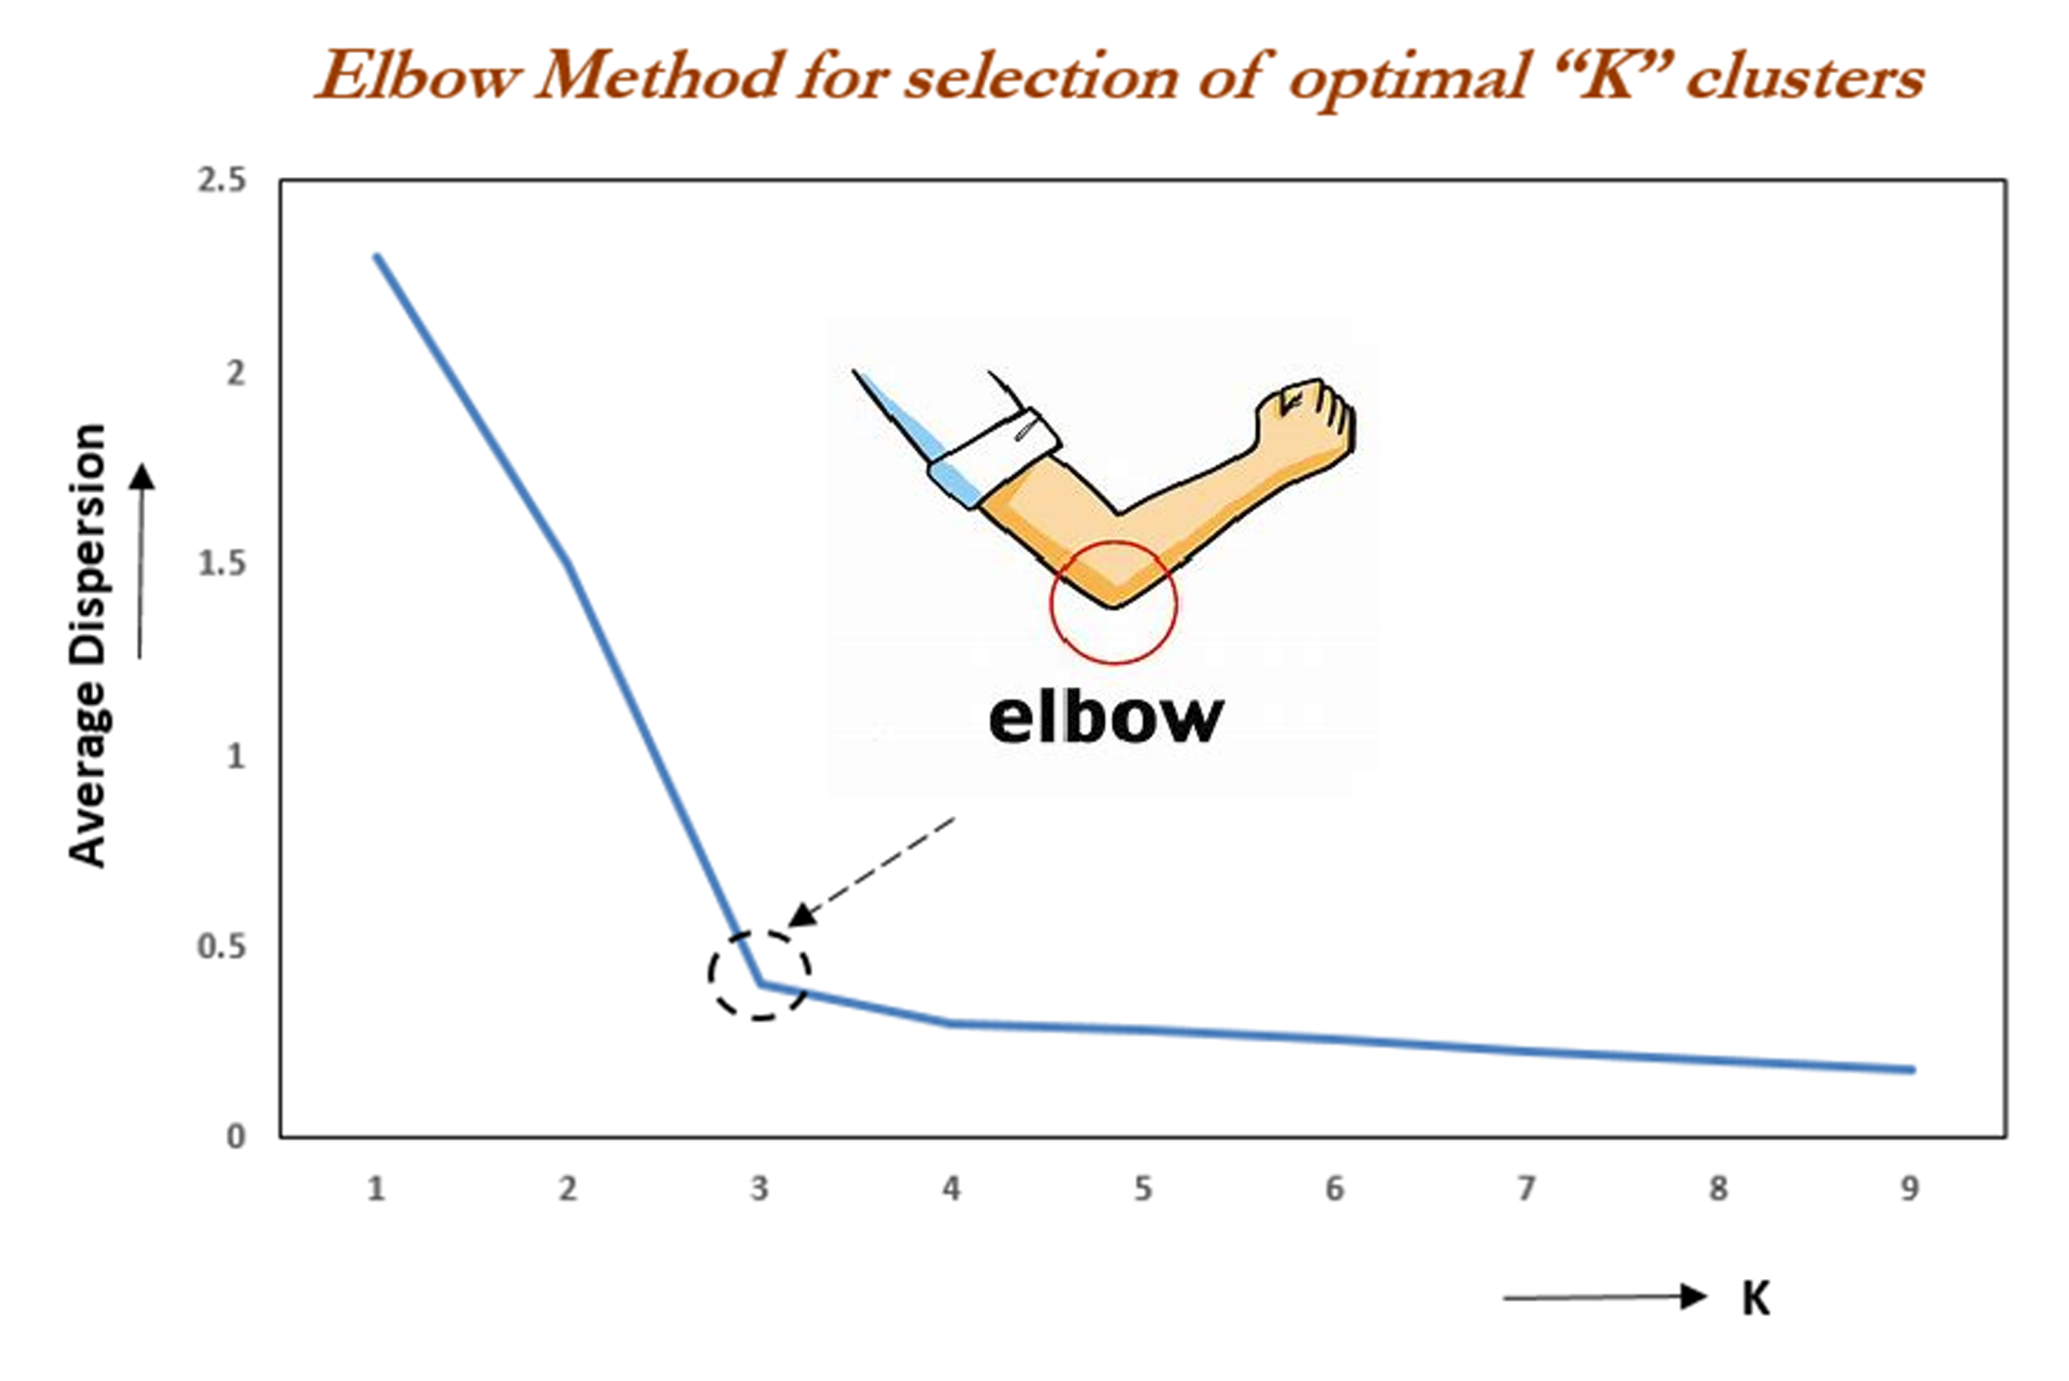

De curve lijkt op een elleboog. In dit voorbeeld is de elleboog op k = 3, dat geeft aan dat de optimale k voor 3 is.

Laten we nu de inertie van ons data plotten. Hiervoor gebruiken we een lineplot met op de x-as het aantal clusters en op de y-as de berekende dispersions. 

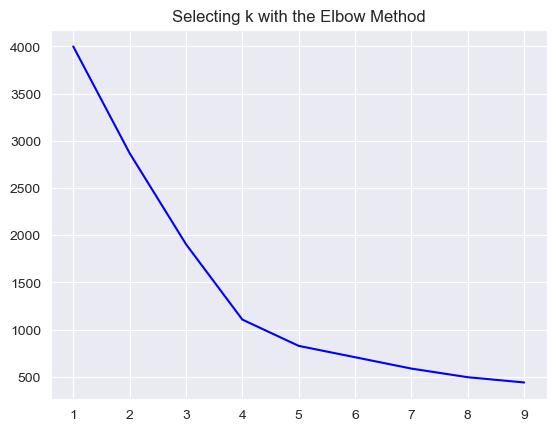

In [39]:
p = sns.lineplot(x=K, y=dispersions,color='blue', markers=True, dashes=False)
p.set_title("Selecting k with the Elbow Method");

### <font color='red'>Opdracht</font> 
Vanuit de lineplot hierboven, wat is de optimale k voor de playlists dataset? Geef de waarde als integer door aan de variabele ```beste_k```. Schrijf in de cel eronder waarom je dat vindt.

In [40]:
beste_k = 2
#geef hier de integer die je hebt gekozen

    <schrijf hier waarom je dit aantal clusters hebt gekozen>


Om op onze onderzoeksvraag terug te komen:

    Hoeveel verschillende muziekgenres kunnen worden gevonden op basis van de eigenschappen van playlists?

Ons uiteindelijke model wordt heeft dus ```beste_k``` clusters. Daar trainen we dus ons uiteindelijke Kmeans clustering model mee:

In [41]:
#maak een KMeans object met het meest optimale aantal clusters
kmeans_best = KMeans(n_clusters=beste_k)

#fit deze op onze gehele dataset X:
kmeans_best_fit = kmeans_best.fit(X)

#haal per playlist het toegewezen de cluster op
labels_best = kmeans_best_fit.labels_


## Evaluatie van ons model
Dankzij maten als __inertia__ en __silhouette score__ kunnen we te weten komen hoe de clusters op onze data passen. Maar wat betekent dat eigenlijk voor onze dataset. Hoe heef het clustering algoritme onze dataset eigenlijk opgesplitst?

Een visuele interpretatie voegt dan veel toe.  Hiervoor gebruiken we de Hue parameter voor ons pairplot:

In [42]:
data_out = X
data_out['labels'] = labels_best
#sns.pairplot(data_out, hue='labels', height=2.5);

### <font color='red'>Opdracht</font>
Schrijf hieronder of je de clusters goed passend vindt. Waarom wel of waarom niet?

Ik vind de clusters goed passend omdat de clusters duidelijk en identiek van elkaar gescheiden zijn

### <font color='red'>Opdracht</font> 

Laten we nu eens kijken naar jouw playlist. Pak een willekeurige playlist van jouw spotify of andere muziekstreamingsdienst. 
Verander jouw gegevens in het dictionary dat tot een pandas datafraime met nieuwe data wordt omgevormd.

In [43]:
jouwdata = {'PID': 5000 ,
            'Gezamenlijke': False ,      
            'Aantal_tracks': 100 ,               
            'Aantal_albums': 5,            
            'Aantal_volgers': 10,              
            'Aantal_edits': 4,
            'Looptijd_ms': 2570961.0,
            'Aantal_artiesten': 5
           }

#maakt van de data een Pandas Dataframe:
df_jij = pd.DataFrame(jouwdata, index=[0])

#print jouw data zodat je kunt zien of het klopt:
df_jij.head()

,PID,Gezamenlijke,Aantal_tracks,Aantal_albums,Aantal_volgers,Aantal_edits,Looptijd_ms,Aantal_artiesten
0,5000,False,100,5,10,4,2570961.0,5


Bereid nu jouw data voor zoals je ook bij het grote dataframe gedaan hebt:

In [44]:
df_jij = vervang_nan(df_jij)
df_jij = vervang_categorienaam(df_jij)

#Gebruik de getrainde Standaardscaler om jouw data te standaardizeren:
# LET OP: de scaler wordt NIET gefit!
df_jij = pd.DataFrame(scaler.transform(df_jij), columns=list(df_jij.columns))
df_jij.head()


,Gezamenlijke,Aantal_volgers,Aantal_edits,Aantal_artiesten
0,-0.160128,-0.204167,-0.655512,-0.723495
1,-0.160128,-0.204167,-0.655512,-0.822248
2,-0.160128,-0.204167,-0.607862,-0.888083
3,-0.160128,-0.204167,7.444872,5.102914
4,-0.160128,-0.204167,0.297475,0.000691


Laten we eens kijken in welk cluster jouw playlist valt:

In [45]:
df_jij.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Gezamenlijke      1000 non-null   float64
 1   Aantal_volgers    1000 non-null   float64
 2   Aantal_edits      1000 non-null   float64
 3   Aantal_artiesten  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


In [46]:
voorspelling_jouw_playlist = kmeans_best.predict(df_jij)[0]
voorspelling_jouw_playlist

1

Dat cijfer zegt nu niet zoveel. Om de genres goed te bepalen, gaan we kijken naar wat voor data er gemiddeld in het cluster zit. In ons geval dus  welk genre muziek er in de playlists zit. We gaan dan labels toekennen aan de clusters, labels die we wel snappen. Bijvoorbeeld:

cluster:
- 0: voornamelijk relax
- 1: voornamelijk party
- 2: voornamelijk workout
- 3: voornamelijk rock
- 4: voornamelijk hiphop
- 5: voornamelijk klassieke muziek
- 6: voornamelijk NL
- 7: voornamelijk Jazz
- 8: voornamelijk Latin
- 9: voornamelijk RnB
- 10: voornamelijk Metal

We hebben hier heel veel labels gegeven, maar uiteindelijk gebruik je natuurlijk het aantal labels dat je als clusters (```beste_k```) in je dataset hebt. In deze opsommingen geven we je het antwoord op beste_k niet kado. 

In [47]:
categorie = {0: "relax", 1: "party", 2: "workout",
             3: "rock", 4: "hiphop", 5: "klassiek",
             6: "NL", 7: "Jazz", 8: "Latin",
             9: "RnB", 10: "Metal"}


#Nu geven we onze voorspelling een label en we zijn klaar!
jouw_genre = categorie[voorspelling_jouw_playlist]
jouw_genre

'party'

<b>Veel plezier met machine learning!</b>

Chaimae, Herman, Mick en Mischa